In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [98]:
raw_df = pd.read_csv('rosbank_train.csv')
raw_df.head(5)
# target_sum - можно выкинуть, переменная участвует в другой задаче

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [99]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 10 columns):
PERIOD          490513 non-null object
cl_id           490513 non-null int64
MCC             490513 non-null int64
channel_type    487603 non-null object
currency        490513 non-null int64
TRDATETIME      490513 non-null object
amount          490513 non-null float64
trx_category    490513 non-null object
target_flag     490513 non-null int64
target_sum      490513 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 37.4+ MB


In [100]:
print("Total clients: ", len(raw_df.cl_id.unique()))

Total clients:  5000


Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [101]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [102]:
# create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  390539
Total transactions in test dataset:  99974


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
5. **Дополнительная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
6. Задания принимаются в виде ноутбука с кодов/картинками выполненной обязательной части

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    

## Практика

In [103]:
# построить графики, посмотреть выбросы или аномалии
# затем сгруппировать так, чтобы потом датасет использоват в обучении модели

In [110]:
# посмотрим на датафрейм еще раз
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [111]:
# посмотрим на данные

In [112]:
len(raw_df)/len(raw_df.cl_id.unique())

98.1026

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D05CCDCC88>,
      dtype=object)

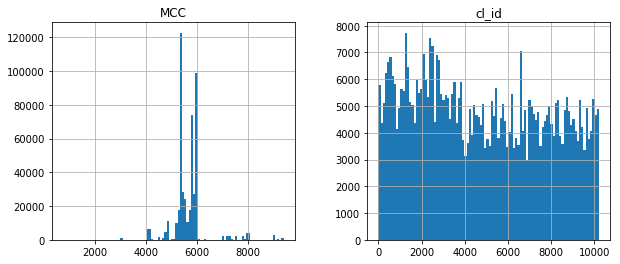

In [113]:
# визуаизируем не все поля, а только коды МСС и айди клиентов
# можно сказать, что есть явно выраженные 3 наиболее популярные группы МСС кодов (ниже посмотрим, что это)
# по cl_id можно сказать, что в среднем все пользователи примерно одинаково активны 
# len(raw_df)/len(raw_df.cl_id.unique()) = чуть более 98 транзакций на одного пользователя

%matplotlib inline
import matplotlib.pyplot as plt
raw_df[['MCC', 'cl_id']].hist(bins=100, figsize=(10,4))

In [108]:
# сгруппируем по id клиента и по коду МСС наш датафрейм (возьмем три наиболее интересные колонки)

In [114]:
raw_df_grouped = raw_df[
    ['cl_id', 'amount', 'MCC']
].groupby(['cl_id', 'MCC']).agg(['sum', 'count'])



In [116]:
raw_df_grouped.head(15)

amount      
                 sum count
cl_id MCC                 
0     5200   5023.00     1
      5411   2031.00     1
      5921    767.00     1
      6011  20000.00     1
      6012  36562.00     1
1     4111     17.10     1
      4468     34.00     1
      5200     23.90     1
      5411  14629.46    12
      5499    492.80     2
      5651     43.98     1
      5661   2392.00     1
      5691   5196.00     3
      5811     12.00     1
      5812   3180.01    19

In [122]:
# с помощью классной функции unstack() разворачиваем датафрейм так, чтобы колонками были категории МСС в порядке возрастания
# при этом, т.к. группировка raw_df_grouped была сделана по двум столбцам (cl_id и MCC), то получим 344 колонки 
# для суммы и 344 - для каунта
# проверить можно так: len(raw_df['MCC'].unique())
raw_df_grouped.unstack().head(10)

amount                                              ...              \
         sum                                              ...  count        
MCC     742  763  780  1520 1711 1731 1750 1799 2741 2842 ...   8699 8911   
cl_id                                                     ...               
0        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
1        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
9        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
10       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
11       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
14       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
20       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
21       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   
22       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN  NaN   

                                               
                                               
MCC   8931 8999 9211 9222 9311 9399 9402 9405  
cl_id                                          
0      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1      NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  
5      NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  
9      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
10     NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  
11     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
14     NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  
20     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
21     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
22     NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  

[10 rows x 688 columns]

In [124]:
# вместо отсутствующих значений пусть будут нули
raw_df_grouped.unstack().fillna(0).head(10)

amount                                              ...              \
         sum                                              ...  count        
MCC     742  763  780  1520 1711 1731 1750 1799 2741 2842 ...   8699 8911   
cl_id                                                     ...               
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
9        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
10       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
11       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
14       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
20       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
21       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
22       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   

                                               
                                               
MCC   8931 8999 9211 9222 9311 9399 9402 9405  
cl_id                                          
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
5      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
9      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
10     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
11     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
14     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
20     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
21     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
22     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[10 rows x 688 columns]

In [125]:
# 688-колоночный датафрейм назовем aggregated_dataset
aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset.head()

amount                                              ...              \
         sum                                              ...  count        
MCC     742  763  780  1520 1711 1731 1750 1799 2741 2842 ...   8699 8911   
cl_id                                                     ...               
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
9        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   
10       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0  0.0   

                                               
                                               
MCC   8931 8999 9211 9222 9311 9399 9402 9405  
cl_id                                          
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
5      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
9      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
10     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 688 columns]

In [126]:
# теперь найдем самые популярные МСС (наиболее часто встречающиеся)
raw_df[['amount', 'MCC']].groupby(['MCC']).agg(['count']).sort_values(('amount', 'count'), ascending=False).head()

,amount
,count
MCC,
5411,121640
6011,54382
5814,41351
5812,30027
5499,27237


In [127]:
# найдем расшифровки кодов МСС на сайте https://mcc-codes.ru/code
# испортируем необходимые библиотеки
from bs4 import BeautifulSoup as bs
import urllib
from urllib.request import urlopen, Request

In [128]:
# сообщим серверу данные о том, кто запрашивает ответ
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'
}
# присвоим переменной значение URL-адреса
reg_url = 'https://mcc-codes.ru/code'
# при помощи функции Request() создадим запрос и приравняем его к переменной req
req = Request(url=reg_url, headers=headers)

In [136]:
# просмотреть код страницы
bs(urlopen(req).read());

In [132]:
# поместим его в переменную check
check = bs(urlopen(req).read())

In [137]:
# HTML тег body содержит весь контент html-документа, 
# который отображается в области просмотрам браузера: 
#текст, ссылки, картинки, таблицы, списки и т.д. 
# найдем его
check.find('body');

In [138]:
#Тег <tr> служит контейнером для создания строки таблицы. 
# Каждая ячейка в пределах такой строки может задаваться с помощью тега <th> или <td>.
# найдем таблицу
check.find_all('tr');

In [148]:
# посмотрим на первый и последний элементы
print(check.find_all('tr')[0], '\n\n',  check.find_all('tr')[-1])

<tr class="bg-white">
<th>MCC</th>
<th>Название</th>
<th>Группа</th>
<th class="d-print-none">Обновлено</th>
</tr> 

 <tr data-mcc="9999">
<td><a href="https://mcc-codes.ru/code/9999"><b>9999</b></a></td>
<td><b>Категория неизвестна</b></td>
<td></td>
<td class="d-print-none">16.07.18</td>
</tr>


In [149]:
# первый [0] элемент нам не нужен, т.к. задает описание таблицы
# возьмем [1]
print(check.find_all('tr')[1], '\n\n',  check.find_all('tr')[-1])

<tr data-mcc="0742">
<td><a href="https://mcc-codes.ru/code/0742"><b>0742</b></a></td>
<td><b>Ветеринарные услуги</b></td>
<td>Контрактные услуги</td>
<td class="d-print-none">31.01.18</td>
</tr> 

 <tr data-mcc="9999">
<td><a href="https://mcc-codes.ru/code/9999"><b>9999</b></a></td>
<td><b>Категория неизвестна</b></td>
<td></td>
<td class="d-print-none">16.07.18</td>
</tr>


In [150]:
# получим все блоки кода с [1:] и поместим их в переменную list_of_mcc_tags
list_of_mcc_tags = check.find_all('tr')[1:]

In [152]:
# приведенный ниже блок html кода (для примера самый первый) надо разбить по символу новой строки 
# и получить список из содержащих смысл строк
list_of_mcc_tags[0]

<tr data-mcc="0742">
<td><a href="https://mcc-codes.ru/code/0742"><b>0742</b></a></td>
<td><b>Ветеринарные услуги</b></td>
<td>Контрактные услуги</td>
<td class="d-print-none">31.01.18</td>
</tr>

In [153]:
# используем метод text и функцию split
list_of_mcc_tags[0].text.split('\n')

['', '0742', 'Ветеринарные услуги', 'Контрактные услуги', '31.01.18', '']

In [157]:
# соберем в список кортежей код МСС и его русскую расшифровку


mcc_names_list = list(
    map(
# функция map принимает два аргумента: функцию и аргумент составного типа данных, 
# например, список. map применяет к каждому элементу списка переданную функцию. 
        lambda x: (x.text.split('\n')[1], x.text.split('\n')[2]), list_of_mcc_tags
    )
)
mcc_names_list[:5]

[('0742', 'Ветеринарные услуги'),
 ('0763', 'Сельскохозяйственные кооперативы'),
 ('0780', 'Услуги садоводства и ландшафтного дизайна'),
 ('1520', 'Генеральные подрядчики – жилое и коммерческое строительство'),
 ('1711',
  'Генеральные подрядчики по вентиляции, теплоснабжению и водопроводу')]

In [160]:
# создаем из mcc_names_list датафрейм mcc_codes
mcc_codes = pd.DataFrame(mcc_names_list)
mcc_codes.head()

,0,1
0,0742,Ветеринарные услуги
1,0763,Сельскохозяйственные кооперативы
2,0780,Услуги садоводства и ландшафтного дизайна
3,1520,Генеральные подрядчики – жилое и коммерческое ...
4,1711,"Генеральные подрядчики по вентиляции, теплосна..."


In [161]:
# дадим названия колонкам
mcc_codes.columns = ['mcc_code', 'mcc_name']
mcc_codes.head()

,mcc_code,mcc_name
0,0742,Ветеринарные услуги
1,0763,Сельскохозяйственные кооперативы
2,0780,Услуги садоводства и ландшафтного дизайна
3,1520,Генеральные подрядчики – жилое и коммерческое ...
4,1711,"Генеральные подрядчики по вентиляции, теплосна..."


In [84]:
# теперь, когда знаем, что коды МСС означают, посмотрим
# за что же чаще всего клиенты расплачиваются? Еда
mcc_codes[(mcc_codes.mcc_code=='5411') | (mcc_codes.mcc_code=='6011')| (mcc_codes.mcc_code=='5814')]

,mcc_code,mcc_name
765,5411,"Бакалейные магазины, супермаркеты"
812,5814,Фастфуд
863,6011,Финансовые учреждения – снятие наличности авто...


In [199]:
# можно по-другому.
# список самых популярных кодов МСС
most_popular_mcc = list(
    raw_df[['amount', 'MCC']].groupby(['MCC']).\
     agg(['count']).sort_values(('amount', 'count'), ascending=False).\
     head().\
    reset_index()\
    ['MCC']
    )
most_popular_mcc

[5411, 6011, 5814, 5812, 5499]

In [207]:
# ТОП-5 все равно еда, если не считать снятия наличности
for mcc in most_popular_mcc:
    print(list(mcc_codes[mcc_codes.mcc_code== str(mcc)]['mcc_name']))

['Бакалейные магазины, супермаркеты']
['Финансовые учреждения – снятие наличности автоматически']
['Фастфуд']
['Места общественного питания, рестораны']
['Различные продовольственные магазины - нигде более не классифицированные']


In [208]:
# Посмотрим, в какие дни и часы совершаются транзакции
# для этого написано две функции
def transaction_by_day_count(dataset):
    """строит датафрейм: столбцы - номера дней недели (0-6)
    строки - id клиентов"""
    # берем наш датасет с одной колонкой 'TRDATETIME', где дата
    # переводим ее в объект datetime и потом обратно в строку с помощью функции strftime
    # при этом возвращаем только %w (в документации написано: Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.)
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w')
    ) 
    # теперь группируем по id клиента и по вновь полученной метрике - номер дня недели
    tmp_df = dataset.groupby(
        ['cl_id','day_of_transaction']
    )['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [ #формируем список уникальных названий колонок из tmp_df
        old_col for old_col in tmp_df.columns.tolist()
        if old_col in dataset['day_of_transaction'].unique()
    ]
    tmp_df.rename( # переименовываем колонки
        columns={old_col: 'day_' + old_col for old_col in old_columns},
        inplace=True
    )
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    """строит датафрейм: столбцы - номера часов в сутках (0-23)
    строки - id клиентов"""
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply(
        lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H')
    ) 
    return dataset.groupby(
        ['cl_id','hour_of_transaction']
    )['hour_of_transaction'].size().unstack().fillna(0).reset_index()

In [209]:
# применяем первую функцию
transaction_by_day_count(raw_df).head()

day_of_transaction,cl_id,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0.0,0.0,2.0,0.0,1.0,0.0,2.0
1,1,7.0,20.0,20.0,16.0,16.0,10.0,15.0
2,5,15.0,19.0,19.0,15.0,25.0,24.0,25.0
3,9,5.0,8.0,7.0,5.0,6.0,4.0,4.0
4,10,74.0,35.0,62.0,68.0,65.0,57.0,102.0


In [210]:
# применяем вторую функцию
transaction_by_hour_count(raw_df).head()

hour_of_transaction,cl_id,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,5,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,0.0
3,9,7.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,3.0
4,10,299.0,3.0,6.0,8.0,14.0,9.0,19.0,17.0,13.0,...,6.0,3.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0


### Агрегирование с помощью Pandas и обучение базовой модели

In [211]:
def get_aggregated_df(df, agg_type, col_to_groupby):
    """получаем агрегированный датафрейм"""
    agg_df = df[['cl_id', col_to_groupby, 'amount']].groupby(['cl_id', col_to_groupby]).agg([agg_type])
    agg_df = agg_df.unstack(fill_value=0)
    agg_df.columns = agg_df.columns.get_level_values(2)

    old_name = agg_df.columns.name
    old_cols = agg_df.columns
    new_cols = [old_name + '_' + agg_type + '_' + str(old_col) for old_col in old_cols]
    agg_df.rename(
        columns={old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}, inplace=True
    )
    return agg_df

In [212]:
#сгруппируем тренировочный датаффрейм id клиента и коду МСС. И просуммируем траты
grouped_df = transactions_train[['cl_id', 'MCC', 'amount']].groupby(['cl_id', 'MCC']).agg(['sum'])

In [213]:
grouped_df.head(10)

amount
                 sum
cl_id MCC           
0     5200   5023.00
      5411   2031.00
      5921    767.00
      6011  20000.00
      6012  36562.00
1     4111     17.10
      4468     34.00
      5200     23.90
      5411  14629.46
      5499    492.80

In [215]:
# с помощью функции unstack развернем коды МСС в колонки
grouped_df.unstack(fill_value=0).head(10)

amount                                              ...                  \
         sum                                              ...                   
MCC     742  763  780  1520 1711 1731 1750 1799 2741 2842 ...  8699 8911 8931   
cl_id                                                     ...                   
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
11       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
14       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
20       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
21       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
22       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
25       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

                                                       
                                                       
MCC      8999   9211    9222   9311    9399 9402 9405  
cl_id                                                  
0         0.0    0.0     0.0    0.0    0.00  0.0  0.0  
1         0.0    0.0     0.0  210.0    0.00  0.0  0.0  
5         0.0    0.0  3825.0    0.0    0.00  0.0  0.0  
10     2400.0    0.0     0.0    0.0    0.00  0.0  0.0  
11        0.0    0.0     0.0    0.0    0.00  0.0  0.0  
14        0.0    0.0     0.0    0.0  254.75  0.0  0.0  
20        0.0    0.0     0.0    0.0    0.00  0.0  0.0  
21        0.0    0.0     0.0    0.0    0.00  0.0  0.0  
22        0.0  511.0     0.0    0.0    0.00  0.0  0.0  
25        0.0    0.0     0.0    0.0    0.00  0.0  0.0  

[10 rows x 332 columns]

In [218]:
#Почему 332 колонки? Видимо в тренировочный датафрейм попали не все МСС, а только 332
len(transactions_train.MCC.unique())

332

In [219]:
# посмотрим, сколько уникальных МСС в исходном датафрейме
len(raw_df.MCC.unique())

344

In [221]:
# можно поиграть с уровнями индексов
grouped_df.unstack(level=0).head()

amount                                                        ...   \
         sum                                                        ...    
cl_id  0     1     5     10    11    14    20    21    22    25     ...    
MCC                                                                 ...    
742      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
763      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
780      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
1520     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
1711     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    

                                                                   
                                                                   
cl_id 10188 10190 10192 10202 10206 10207 10210 10213 10214 10215  
MCC                                                                
742     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
763     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
780     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1520    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1711    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 4000 columns]

In [226]:
# метрики по МСС надо посчитать для клиентов (их id должны быть по вертикали)
grouped_df.unstack(fill_value=0, level=1).head()

amount                                              ...                  \
         sum                                              ...                   
MCC     742  763  780  1520 1711 1731 1750 1799 2741 2842 ...  8699 8911 8931   
cl_id                                                     ...                   
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
11       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

                                                  
                                                  
MCC      8999 9211    9222   9311 9399 9402 9405  
cl_id                                             
0         0.0  0.0     0.0    0.0  0.0  0.0  0.0  
1         0.0  0.0     0.0  210.0  0.0  0.0  0.0  
5         0.0  0.0  3825.0    0.0  0.0  0.0  0.0  
10     2400.0  0.0     0.0    0.0  0.0  0.0  0.0  
11        0.0  0.0     0.0    0.0  0.0  0.0  0.0  

[5 rows x 332 columns]

In [227]:
# сделаем датафрейм из двух датафреймов, которые получим с помощью написанной ранее функции get_aggregated_df
# одна его чать будет отражать среднее значение трат по каждому МСС
# вторая - сумму трат
df_train_mcc = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='MCC'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='MCC'),
    left_index=True,
    right_index=True,
)

In [228]:
# получаем датафрейм из 334*2 колонок с красивыми названиями, которые возвращает функция get_aggregated_df
df_train_mcc.head()

MCC,MCC_mean_742,MCC_mean_763,MCC_mean_780,MCC_mean_1520,MCC_mean_1711,MCC_mean_1731,MCC_mean_1750,MCC_mean_1799,MCC_mean_2741,MCC_mean_2842,...,MCC_sum_8699,MCC_sum_8911,MCC_sum_8931,MCC_sum_8999,MCC_sum_9211,MCC_sum_9222,MCC_sum_9311,MCC_sum_9399,MCC_sum_9402,MCC_sum_9405
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,210.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3825.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
# в тренировочном датафрейме имеем 390 тыс строк и только 10 аналитик
transactions_train.shape

(390539, 10)

In [230]:
# в полученном датафрейме имеем 4 тыс строк и целых 334*2 фичей
df_train_mcc.shape

(4000, 664)

In [231]:
len(transactions_train.MCC.unique())*2

664

In [235]:
# теперь поработаем с колонкой trx_category - способ расходования средств
transactions_train.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [236]:
# посмотрим на количество транзакций в разрезе способов расходования средств
transactions_train.trx_category.value_counts()

POS               331512
DEPOSIT            16691
WD_ATM_ROS         15229
WD_ATM_PARTNER      8008
C2C_IN              5952
WD_ATM_OTHER        5674
C2C_OUT             4340
BACK_TRX            2148
CAT                  956
CASH_ADV              29
Name: trx_category, dtype: int64

In [237]:
# как мы делали выше, создадим датафрейм из двух датафреймов, 
#которые получим с помощью написанной ранее функции get_aggregated_df
# одна его чаcть будет отражать среднее значение трат по каждой trx_category
# вторая - сумму трат
df_train_trx_category = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='trx_category'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='trx_category'),
    left_index=True,
    right_index=True,
)

In [238]:
# вопрос: все операции в рублях?
# ответ - нет
raw_df.currency.unique()

array([810, 978, 504, 704, 981, 985, 840, 949,  51, 826, 214, 764, 203,
       702, 360, 756, 933, 975,  36, 191, 784, 980, 124, 398, 376, 944,
       352, 417, 156, 752, 392, 484, 634, 188, 643, 348, 356, 458, 986,
       498, 578, 208, 344,  32, 410, 788, 480, 604, 941, 144, 946, 710,
       690,  44, 170, 901, 608, 554, 462], dtype=int64)

In [244]:
# можем ли пренебречь другими валютами кроме рубля? Посмотрим, как много раз они встречаются
# 97,3% данных рублевых - код 810
raw_df.currency.value_counts()/len(raw_df)*100

810    97.376420
978     1.128614
840     0.391631
933     0.114370
985     0.086236
764     0.083994
203     0.081343
949     0.079509
975     0.060549
826     0.054433
784     0.053413
980     0.042608
392     0.040162
981     0.033434
348     0.030784
756     0.025687
578     0.022426
410     0.022426
752     0.022222
702     0.020387
398     0.020183
191     0.019367
360     0.014679
156     0.014271
51      0.012232
376     0.012232
352     0.012028
484     0.010805
704     0.010601
124     0.008359
356     0.008155
144     0.008155
417     0.007135
498     0.007135
344     0.006932
643     0.006524
480     0.006524
214     0.006320
944     0.006320
554     0.005504
458     0.004077
36      0.003466
32      0.002446
986     0.002446
208     0.002446
504     0.002243
690     0.001631
941     0.001631
901     0.001019
946     0.000815
604     0.000612
170     0.000612
462     0.000408
44      0.000408
608     0.000408
634     0.000408
710     0.000408
188     0.000204
788     0.0002

In [259]:
# узнал много инересного про коды валют
# в России рубл обозначают кодом 643 и 810
643 in raw_df.currency.unique()

True

In [356]:
# сджойним датафрейм из 664 колонок по МСС с датафреймом из 20 колонок по trx_category

In [357]:
df_train_mcc = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='MCC'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='MCC'),
    left_index=True, # джоин по индексу левого датафрейма
    right_index=True, # джоин по индексу правого датафрейма
)

df_train_trx_category = pd.merge(
    get_aggregated_df(transactions_train, agg_type='mean', col_to_groupby='trx_category'),
    get_aggregated_df(transactions_train, agg_type='sum', col_to_groupby='trx_category'),
    left_index=True,
    right_index=True,
)

df_train = pd.merge(
    df_train_mcc,
    df_train_trx_category,
    left_index=True,
    right_index=True,
)

In [358]:
df_train.head()

,MCC_mean_742,MCC_mean_763,MCC_mean_780,MCC_mean_1520,MCC_mean_1711,MCC_mean_1731,MCC_mean_1750,MCC_mean_1799,MCC_mean_2741,MCC_mean_2842,...,trx_category_sum_BACK_TRX,trx_category_sum_C2C_IN,trx_category_sum_C2C_OUT,trx_category_sum_CASH_ADV,trx_category_sum_CAT,trx_category_sum_DEPOSIT,trx_category_sum_POS,trx_category_sum_WD_ATM_OTHER,trx_category_sum_WD_ATM_PARTNER,trx_category_sum_WD_ATM_ROS
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36562.00,0.0,0.00,20000.0,7821.00,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,95000.0,122578.04,0.0,0.0,50000.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13990.0,0.0,33878.38,0.0,0.00,130000.0,290500.75,5500.0,6000.0,66500.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10000.0,21692.90,0.0,37694.98,426300.0,200956.11,0.0,5400.0,422300.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,182000.0,245747.14,0.0,0.0,0.0


In [363]:
# возьмем таргеты из исходного датафрейма
df_targets = raw_df[['cl_id', 'target_flag']].drop_duplicates().copy()
df_targets.index = df_targets['cl_id']
df_targets = df_targets.drop('cl_id', axis=1)
df_targets.head()

,target_flag
cl_id,
0,0
1,0
5,1
9,0
10,0


In [364]:
# сджойним полученный df_train (684 колонки) и таргеты (1 колонка)
df_train = pd.merge(
    df_train,
    df_targets,
    left_index=True,
    right_index=True,
    how='inner' # внутреннее объединение, т.к. важно, чтобы индексы df_train остались все и по ним были присоединены таргеты
)

In [365]:
df_train

,MCC_mean_742,MCC_mean_763,MCC_mean_780,MCC_mean_1520,MCC_mean_1711,MCC_mean_1731,MCC_mean_1750,MCC_mean_1799,MCC_mean_2741,MCC_mean_2842,...,trx_category_sum_C2C_IN,trx_category_sum_C2C_OUT,trx_category_sum_CASH_ADV,trx_category_sum_CAT,trx_category_sum_DEPOSIT,trx_category_sum_POS,trx_category_sum_WD_ATM_OTHER,trx_category_sum_WD_ATM_PARTNER,trx_category_sum_WD_ATM_ROS,target_flag
cl_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,36562.00,0.0,0.00,20000.0,7821.00,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,95000.0,122578.04,0.0,0.0,50000.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,33878.38,0.0,0.00,130000.0,290500.75,5500.0,6000.0,66500.0,1
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10000.00,21692.90,0.0,37694.98,426300.0,200956.11,0.0,5400.0,422300.0,0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,182000.0,245747.14,0.0,0.0,0.0,0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,152700.00,0.00,0.0,0.00,0.0,258990.17,0.0,0.0,37000.0,1
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,215000.0,222308.09,0.0,0.0,0.0,0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4001.00,0.00,0.0,0.00,112000.0,220103.65,0.0,0.0,0.0,0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,500.00,122600.0,110267.00,3000.0,9900.0,3500.0,0


In [366]:
df_train.shape

(4000, 685)

In [367]:
# берем из библиотеки sklearn логистисекую регрессию
from sklearn.linear_model import LogisticRegression

In [368]:
clf = LogisticRegression()
X_train = df_train.drop(['target_flag'], axis=1)
y_train = df_train['target_flag']

In [369]:
clf.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [370]:
from sklearn.metrics import roc_auc_score, roc_curve

In [371]:
y_train_predict = clf.predict_proba(X_train)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
print("Train: ", roc_auc_train)

Train:  0.76


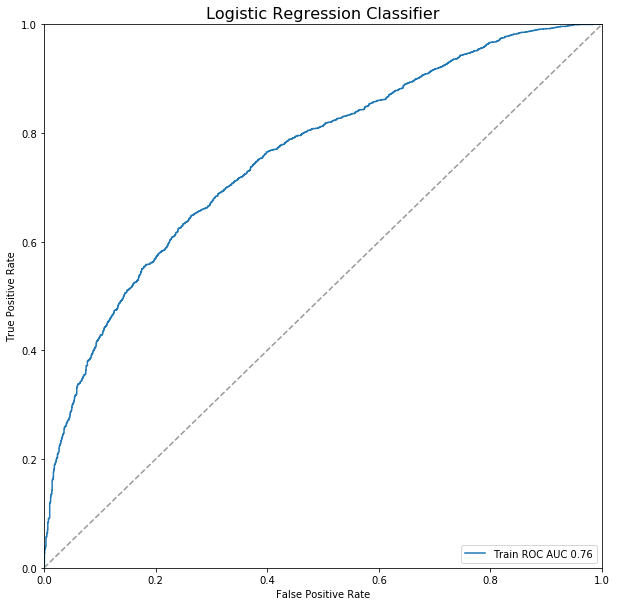

In [372]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()